## Practical Assignment 11.1:  What drives the price of a car?

### Overview
This project analyzes a dataset of 426,000 used vehicles to understand which factors most influence their selling price. Following the CRISP-DM methodology, this notebook moves through the full analytical workflow: defining the business need, examining the dataset, preparing and cleaning the data, building regression models, and summarizing the results. The goal is to provide a fictional used-car dealership with a model that can help them easily evaluate the resale value of a used car based different vehicle attributes.

#### Objective
The objective of this assignment is to identify the vehicle attributes that have the strongest impact on used car prices and to build models capable of estimating price using those key variables. Through a combination of data cleaning, exploratory analysis, and regression modeling (Linear, Polynomial, Ridge, and Lasso), the project aims to quantify how price varies with factors such as vehicle age, mileage, and manufacturer. The final outcome is a set of practical insights and a predictive model that the dealership can use to support pricing decisions.

#### Dataset
The dataset, `vehicles.csv`, contains 426,000 used car listings with fields such as year, manufacturer, model, odometer, title status, drive, fuel, cylinders, and price. It is a reduced version of a larger Kaggle dataset originally containing about 3 million listings. The raw CSV was not modified directly; all cleaning and processing were done inside this notebook.

Due to GitHub file-size limits, the dataset is provided as a compressed ZIP file: `vehicles.zip`.

#### Notebook Structure
This notebook, `Practical_Assignment_11.1_Jonathan_O'Dea.ipynb`, includes the following sections:

1. Business Understanding
2. Data Understanding
3. Initial assumptions
4. Data Preparation
5. Exploratory Data Analysis (EDA)
6. Modeling
   - Simple and Multiple Linear Regression
   - Polynomial Regression
   - Ridge Regression (L2)
   - LASSO Regression (L1)
7. Evaluation
8. Deployment
9. Findings & Recommendations

#### Summary of Findings
Based on this dataset and the cleaning applied to it, this analysis shows that the price of a used car can be driven by three factors: age, mileage, and manufacturer. Newer cars and cars with lower mileage consistently sell for more, and brands with stronger reputations tend to hold their value better. 

Using these features, the **Ridge Regression model with degree-4 polynomial features** provided the most accurate predictions, estimating prices within roughly ±`$5.6K` on average (MAE). While the model performs well with the available data, more detailed information (such as model trim level, engine type, and condition) would improve accuracy further.

#### Actionable Ideas for the Client
- Prioritize vehicles that are newer and have lower mileage, as these factors most reliably increase resale value.
- Highlight brand reputation when pricing or marketing vehicles.

#### Next Steps for Future Modeling
- Clean the model column further to extract trim level details, body style, and engine.
- Incorporate vehicle condition if a reliable subset of the data can be validated.
- Repeat categorical encoding for drivetrain, fuel type, and transmission as was done with manufacturer.

#### How to Run

1. The public project repository can be located at: https://github.com/Jonny802/Practical-Application-Assignment-11.1
2. Download the project file `Practical_Assignment_11.1_Jonathan_O'Dea.ipynb` and `vehicles.zip` file locally
3. Place it inside a local /data folder, so the structure looks like:
   
    │── /data
   
    │ └── vehicles.zip
   
5. The notebook is configured to load the dataset from the /data directory. (You may extract vehicles.csv manually, but extraction is optional.)
6. Run cells top-to-bottom.

---

----

### 1. Business Understanding 

The client is a used-car dealership that wants to understand which factors most consistently affect resale prices. Their goal is to buy vehicles at a fair cost, price them appropriately, and avoid overpaying for cars that won’t retain value.

From a data perspective (CRISP-DM), the business question becomes:

Which features in the dataset are predictive of a vehicle’s price, and how accurately can we estimate price using statistical and machine-learning models?

Success is defined as:

- Identifying the most influential features (e.g., year, mileage, manufacturer)
- Quantifying their relationship with price
- Producing a model that can reasonably estimate price given a subset of key variables
- Providing the dealership with clear, actionable recommendations based on the analysis

The target outcome is one where the most influential variables can clearly identified, quantify their relationships with price, and build a model that gives reasonable price estimates using a small number of key features.

---

### 2. Data Understanding

The dataset includes a wide range of vehicle attributes such as year, manufacturer, model, condition, title status, odometer, type, fuel, transmission, drivetrain, cylinders, and price, among others. Before modeling, it was necessary to explore each variable to:

- Identify missing, inconsistent, or incorrect values
- Understand ranges and distributions
- Detect outliers and anomalies
- Examine relationships between predictors and price
- Determine which variables are potentially useful for modeling

Initial inspection showed that some fields (e.g., model, paint color) were highly inconsistent or not relevant for predicting price. Others, such as condition and title status, were important but had too many missing or non-standard entries to be included directly without heavy assumptions.

The steps taken to clean and prepare the data will be described and shown in a later section.

---

### 3. Initial assumptions

Based on real-world expectations and the initial exploration of the dataset, several factors are generally known to influence the price of a used vehicle. These assumptions helped guide the early cleaning and analysis.

**Key factors that affect the price of a vehicle:**
- **Year** - Newer cars usually hold more value due to updated features and better safety standards.
- **Condition** - The physical and mechanical state of the car affects price significantly.
- **Odometer reading** - Vehicles with higher mileage tend to sell for less, as wear and tear is directly tied to usage.
- **Title status** - A clean title (or status) is worth more than salvage or non-standard titles.

**Secondary factors that influence price:**
- **Manufacturer (make)** - Some brands consistently hold their value better than others. 
- **Model** - Higher-end trims or more capable versions often cost more.
- **Vehicle type and size** - Trucks and SUVs are often priced higher than compact cars, even at similar ages and mileage.
  
**Third-level factors that do affect the price, but to a lesser extent and usually affects new cars more:**
- **Cylinders, fuel, transmission and drive** - Factors usually considered within the make and model, and drive the price variation to a lesser extent. 

**Lower-impact or out-of-scope elements:**
- **Region or state** - Not essential for the purpose of this analysis.
- **Paint color** - Generally not a major determinant of price.

These assumptions formed the basis in which the data was treated and feature selection for modeling.

---

### 4. Data Preparation

This section prepares the dataset for analysis and modeling. Several cleaning steps are required due to missing values, inconsistent entries, unrealistic values, and large text-based fields. The goal is to construct a reliable dataset that captures meaningful vehicle characteristics without introducing noise or bias.

#### 4.1. Imports
All analysis was performed using standard Python libraries, including pandas, NumPy, seaborn, matplotlib, and several scikit-learn modules for modeling and preprocessing.

In [1]:
# --------------------------------------------
# Imports
# --------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import zipfile

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

#--------------------------------------------
# Load data from CSV
#--------------------------------------------
# Due to GitHub file-size limits, the dataset is provided as a compressed ZIP file (vehicles.zip). The notebook automatically loads it.
with zipfile.ZipFile("data/vehicles.zip") as z:
    with z.open("vehicles.csv") as f:
        vehicles = pd.read_csv(f)

#### 4.2. Initial Dataset Review

The dataset was first reviewed using .head(), .info(), missing-values, and .unique() value summaries. This showed that:

- some key fields had missing values (e.g., manufacturer, condition, year)
- textual fields like model and manufacturer were inconsistent
- price, year, and odometer included unrealistic values
- several categorical fields had mixed formats or unclear labels
- there were duplicates across multiple columns

These issues required cleaning before further analysis or modeling could take place.

In [2]:
# --------------------------------------------
# Dataset Review
# --------------------------------------------
vehicles.head()
vehicles.info()
vehicles.isnull().sum()
vehicles.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

#### 4.3. Data Cleaning

**Missing values:**
Rows missing critical information such as model, fuel, transmission, odometer, or year were removed.
The condition column was dropped entirely because around 40% of the values were missing, making it unreliable for this analysis.

**Title status:**
Only vehicles with clean or rebuilt titles were retained. Vehicles labeled as lien, salvage, missing, parts only, or unknown were excluded, as these would not realistically be sold through a standard used-car dealership.


**Removing unrealistic or irrelevant values:**
To focus on a realistic modern used-car dealership scenario, the following filters were applied:

- **Price:** Only vehicles priced between `$2,000` and `$100,000` were kept. This removes dummy listings, luxury outliers, or unreasonably low values.
- **Year:** Only vehicles from 1990 to 2021 were included. Older vehicles act more like collectibles, and extremely new vehicles often lacked complete information.
- **Odometer:** Values above 300,000 miles were dropped, and zero-mileage entries were removed as potential errors.
- **New vs. used logic:** Making the distinction between older vehicles with unrealistically low odometer readings vs. new cars with acceptable low odometer readings.


**Noise reduction:**
- Text was converted to lowercase
- Non-alphanumeric characters were removed
- Categorical columns with many missing entries (size, type, drive, cylinders, paint_color) were filled with "unknown"


**Cleaning and rebuilding the manufacturer column:**
The manufacturer column contained many missing values, key to grouping. The model column had many inconsistent entries, many of which contained the manufacturar name within. In order to gain additional data for the manufacturing column, the following steps were taken:

- Known makes were extracted from the dataset into a list.
- Additional makes were manually added to the list from reviewing the model column.
- Missing manufacturers were recovered by scanning the model text for recognizable make names.
- The recovered manufacturer names were written back into the dataset.
- Detected manufacturer names were removed from the model text to avoid duplication.


**Feature engineering:**
Three engineered features were created:

- **odometer_grouped_upper:** Odometer values were split into 10,000-mile bins for easier visualization.
- **make_mean_value:** Each vehicle was assigned the mean price of its manufacturer, providing a simple brand-value indicator.
- **decades:** Year values were split into 10 year bins for easier visualization.


**Duplicate removal:**
- Duplicate rows were removed based on a combination of key vehicle attributes.
- Year and odometer were converted to integer types.


In [3]:
# --------------------------------------------
# Missing values
# --------------------------------------------

# Drop the NaNs from the following columns:
# - 'model' NaNs - counts for a little more than 1% of the data - critical to analyze value of the vehicle.
# - 'fuel' NaNs - counts for about 1% of the data- required to analyze value of the vehicle.
# - 'transmission' NaNs - counts for less than 1% of the data - required to analyze value of the vehicle.
# - 'odometer' NaNs - counts for less than 1% of the data - required to analyze value of the vehicle.
# - 'year' NaNs - counts for less than 1% of the data - required to analyze value of the vehicle.
vehicles = vehicles.dropna(subset=["model", "fuel", "transmission",  "odometer", "year"])

# Drop the 'VIN' column completely, not relevant to the price of the vehicle.
vehicles = vehicles.drop("VIN", axis=1, errors="ignore")

# Drop the 'condition' column completely, not ideal but cannot trust 40% of the data not knowing the condition of the vehicle.
vehicles = vehicles.drop("condition", axis=1, errors="ignore")

# --------------------------------------------
# Title status filter
# --------------------------------------------

# Remove any cars not worth selling or using for our analysis -  'lien', nan (unknown), 'salvage', 'missing', 'parts only'.
# Accept only clean, and rebuit cars.
approved_titles = ["clean", "rebuilt"]
vehicles = vehicles[vehicles["title_status"].isin(approved_titles)]

# --------------------------------------------
# Unrealistic or irrelevant values
# --------------------------------------------

# Eliminate unreasonable and irrelevant price ranges/ ranges that overly skew the data.
# If the car costs over $100,000 you are not buying it from a used car dealership..
vehicles = vehicles[(vehicles["price"] >= 2000) & (vehicles["price"] <= 100000)]

# Eliminate unreasonable and irrelevant year ranges/ ranges that overly skew the data.
# Focusing on a more "realistic" range of vehicles at a car dealership.
# Removing outliers on last year that affect negatively the model, probably due to missing information
vehicles = vehicles[(vehicles["year"] >= 1990) & (vehicles["year"] <= 2021)]

# Eliminate unreasonable and irrelevant odometer ranges/ ranges that overly skew the data.
vehicles = vehicles[(vehicles["odometer"] <= 300000)]
vehicles = vehicles[vehicles["odometer"] != 0]

# Remove instances when misleading odometer were used.
# Make temporary DataFrames to enable multiple conditions to the filter:
new_cars = vehicles[vehicles["year"] >= 2021]
old_cars = vehicles[(vehicles["year"] < 2021) & (vehicles["odometer"] >= 1000)]
# Join and re-establish the vehicles DataFrame
vehicles = pd.concat([new_cars, old_cars])

# --------------------------------------------
# Noise reduction
# --------------------------------------------

# Make 'model' column all lower case to help with data cleanup
vehicles["model"] = vehicles["model"].str.lower()

# Remove all non letters and numbers from the model column.
vehicles["model"] = vehicles["model"].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

# Fill remaining 'size', 'type', 'drive', 'transmission', and 'cylinders' NaNs with "unknown", 'paint_color' also to remove NaNs.
# These values can vary greatly, even between same make and model vehicle and can cause incorrect assumptions in models.
cols_to_fill = ["size", "type", "drive", "transmission", "cylinders", "paint_color"]
vehicles[cols_to_fill] = vehicles[cols_to_fill].fillna("unknown")

# Change 'year' and 'odometer' columns from floats to integers
vehicles['year'] = vehicles['year'].astype(int)
vehicles['odometer'] = vehicles['odometer'].astype(int)

# --------------------------------------------
# Duplicate removal 
# --------------------------------------------

# Drop duplicates based on multiple repeated information on varios columns
vehicles.drop_duplicates(subset=["year", "manufacturer", "model","odometer","fuel", "transmission", "title_status"], keep='first', inplace=True)

# Sort "manufacturer" column by alphabetical order
sorted_make_names = sorted(vehicles['manufacturer'].astype(str).unique())

# --------------------------------------------
# Feature engineering - odometer_grouped_upper
# --------------------------------------------

# Split odometer into bins for easier visualization:
# Define bin range 
bin_amount = 10000
min_val = 0
max_val = vehicles['odometer'].max()
# Set intervals: np.arange([start, ]stop, [step, ]
bins = np.arange(min_val, max_val + bin_amount, bin_amount)
# Cut up original column and make a new one with grouped bins (upper limit)
vehicles['odometer_grouped_upper'] = pd.cut(vehicles['odometer'], bins=bins, right=True, include_lowest=True)
vehicles['odometer_grouped_upper'] = vehicles['odometer_grouped_upper'].apply(lambda x: x.right).astype(int)

In [4]:
# --------------------------------------------
# Cleaning and rebuilding the manufacturer column
# -------------------------------------------- 

# Make a list of identified makes:
identified_makes = (vehicles["manufacturer"].dropna().unique())
identified_makes.sort()

# Additional makes manually searched for - will not be ALL other makes.
# Brands like "yamaha" and "kawasaki" left out as they are boats and bikes.
# Others like "international", "mack" and "freightliner" are not included as they are freighter trucks.
# The likes of "maserati" and "lamborghini" will get filtered out by price.
additional_makes_list = ['scion', 'smart', 'suzuki', 'saab', 'maserati', 'corvette', 'genesis', 'hummer',  
                         'isuzu', 'plymouth', 'oldsmobile', 'coachman', 'workhorse', 'daytona', \
                         'bentley', 'renault', 'lamborghini']
additional_makes_array = np.array(additional_makes_list)

makes = np.append(identified_makes, additional_makes_array)

# Fill in the 'manufacturer' column where the value is blank, but it is written in the model column along with the make.
blank_makes_list = []   # make a new list to fill in the blanks

for idx, model in vehicles["model"].items():  # do each index, in order, perform a for loop over each row in the 'model' column
    matched_make = "unknown"   # assume it is blank and therefore unknown
    if isinstance(model, str):   # check if its a string
        for i in makes:   # loop through the identified makes list
            if i in model:
                matched_make = i  # if found, assign it as a match
                break  
                
    if matched_make == "unknown":   # its default value is now 'unknown', so, if the value is 'unknown' at this stage, proceed with:...
        original = vehicles.loc[idx, "manufacturer"]   # check original value in the 'manufacturer' 
        if isinstance(original, str):   # if it is a string...
            matched_make = original   # use the original value

    blank_makes_list.append(matched_make)
    
vehicles["manufacturer"] = blank_makes_list  # column is now rewritten based on these filters

# Now, remove the 'manufacturer' names from the 'model' column. 

def remove_matched_text(row):
    model_text = row["model"]
    manufacturer_name = row["manufacturer"]
    # Check if the manufacturer name is a substring of the model name text
    if manufacturer_name in model_text:
        # Replace the first occurrence of the manufacturer name with an empty string
        # Implement complex regex for multiple occurrences of make name
        return model_text.replace(manufacturer_name, '').strip()
    else:
        return model_text

# Apply the function across rows (axis=1) and replace into 'model' column
vehicles["model"] = vehicles.apply(remove_matched_text, axis=1)

# --------------------------------------------
# Feature engineering - make_mean_value
# --------------------------------------------

# Get the average vehicle price per manufacturer
vehicles["make_mean_value"] = (vehicles.groupby("manufacturer")["price"].transform("mean")).astype(int)

# --------------------------------------------
# Feature engineering - grouping years into decades
# --------------------------------------------

# Split years into bins for easier visualization:
# Define bin range 
bin_amount = 10
min_val = 1990
max_val = 2021
# Set intervals: np.arange([start, ]stop, [step, ]
bins = np.arange(min_val, max_val + bin_amount, bin_amount)
# Cut up original column and make a new one with grouped bins (lower limit)
vehicles['decades'] = pd.cut(vehicles['year'], bins=bins, right=False)
vehicles['decades'] = vehicles['decades'].apply(lambda x: x.left)

#### 4.4. Post Filter Checks
After cleaning, the dataset was checked again for:

- missing values
- duplicated entries
- incorrect data types
- unusual distributions

In [5]:
# --------------------------------------------
# Post Filter Checks
# --------------------------------------------
vehicles.nunique()
vehicles.isnull().sum()
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182520 entries, 202 to 426846
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   id                      182520 non-null  int64   
 1   region                  182520 non-null  object  
 2   price                   182520 non-null  int64   
 3   year                    182520 non-null  int64   
 4   manufacturer            182520 non-null  object  
 5   model                   182520 non-null  object  
 6   cylinders               182520 non-null  object  
 7   fuel                    182520 non-null  object  
 8   odometer                182520 non-null  int64   
 9   title_status            182520 non-null  object  
 10  transmission            182520 non-null  object  
 11  drive                   182520 non-null  object  
 12  size                    182520 non-null  object  
 13  type                    182520 non-null  object  
 14  paint_c

#### 4.5. Post Data Cleanup Analysis

After cleaning and reviewing the data set, the initial assumptions were changed in several ways:

- The condition column, although intially considered important, could not be used due to excessive missing data (40%).
- The model field, being another important indicator in real-world pricing and means to categorize in detail, was too inconsistent to include directly in modeling without extensive manual cleaning.
- The dataset was reduced to a 1990–2021 window to manage reasonable price/odometer ranges. This also helped in replicating a real-world scenario.
- Filtering title status to only clean and rebuilt vehicles to align with realistic resale conditions.

The cleanup process will help with the modeling stage of the data, and made it possible to identify three key areas that affected vehicle prices: vehicle age, mileage, and manufacturer.

---

### 5. Exploratory Data Analysis (EDA)
Several exploratory plots were produced to examine how price relates to variables such as year, odometer, and manufacturer, providing a visual check that would become the base of the models.

#### 5.1. Price vs. Year

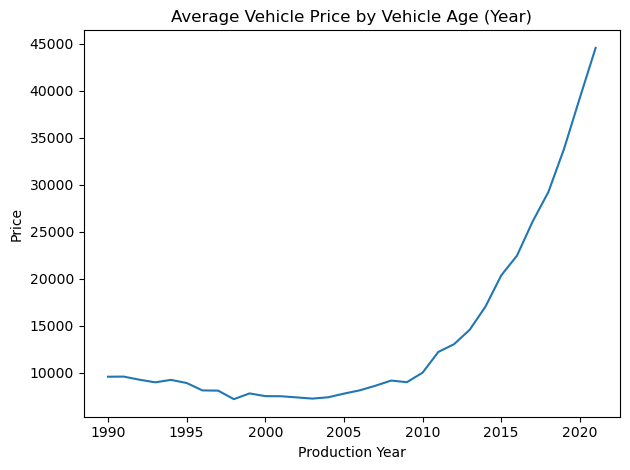

In [6]:
avg_price_by_year = vehicles.groupby("year")["price"].mean()
plt.plot(avg_price_by_year.index, avg_price_by_year.values)
plt.title('Average Vehicle Price by Vehicle Age (Year)')
plt.xlabel('Production Year')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

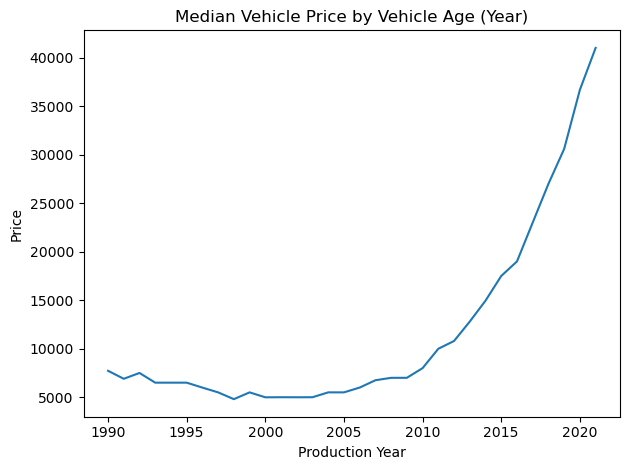

In [7]:
median_price_by_year = vehicles.groupby("year")["price"].median()
plt.plot(median_price_by_year.index, median_price_by_year.values)
plt.title('Median Vehicle Price by Vehicle Age (Year)')
plt.xlabel('Production Year')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

#### 5.2. Price vs. Odometer

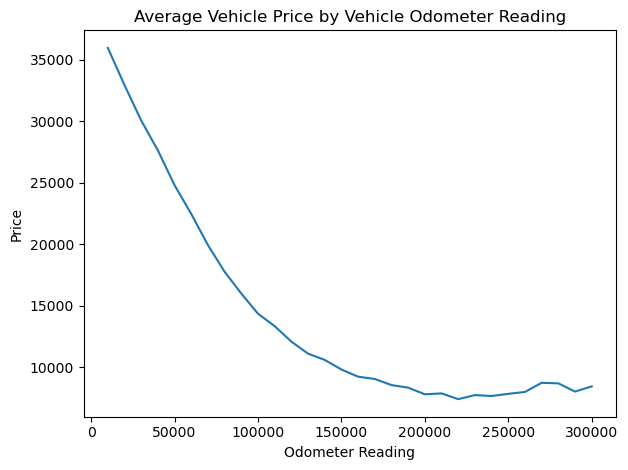

In [8]:
avg_price_by_year = vehicles.groupby("odometer_grouped_upper")["price"].mean()
plt.plot(avg_price_by_year.index, avg_price_by_year.values)
plt.title('Average Vehicle Price by Vehicle Odometer Reading')
plt.xlabel('Odometer Reading')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

#### 5.3. Price vs. Manufacturer

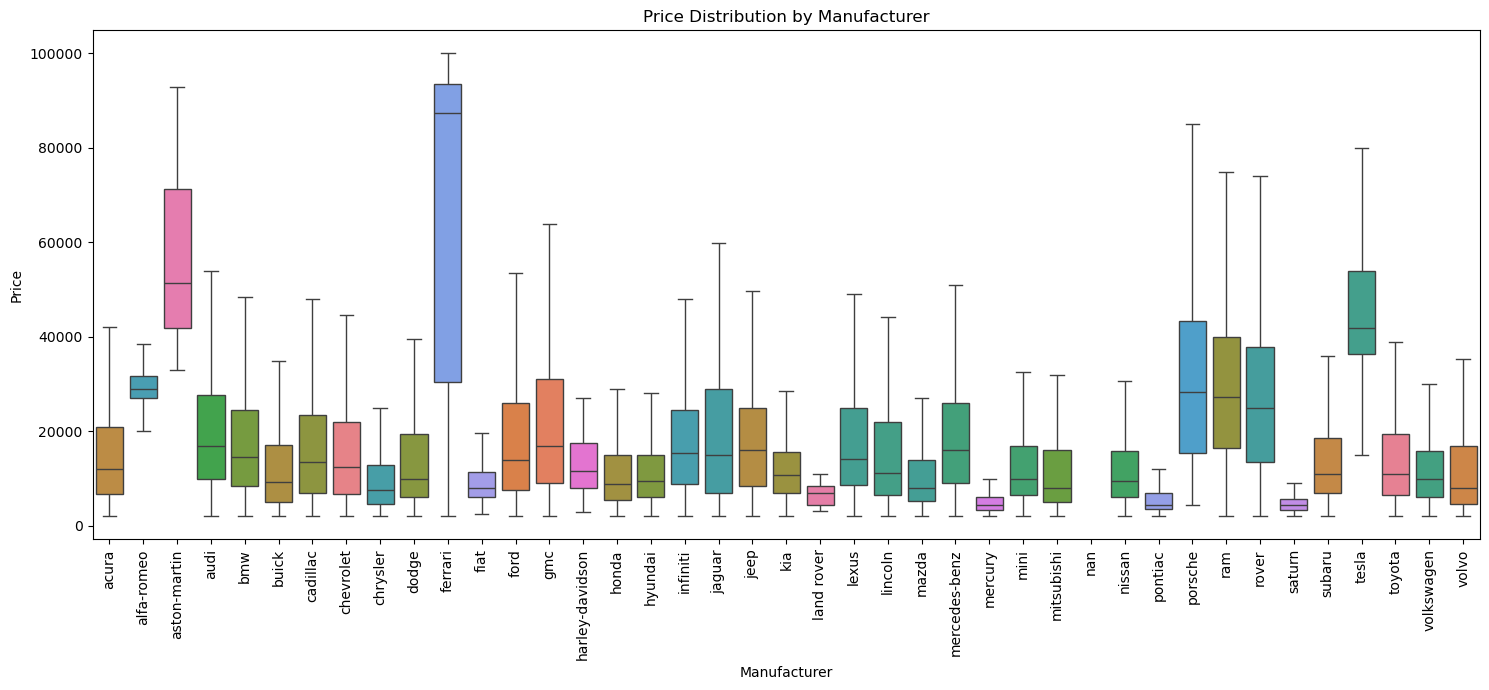

In [9]:
plt.figure(figsize=(15,7))
sns.boxplot(x = 'manufacturer', y = 'price', data = vehicles, order = sorted_make_names, fliersize=0, hue = 'manufacturer')
plt.xticks(rotation=90)
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.title('Price Distribution by Manufacturer')
plt.tight_layout()
plt.show()

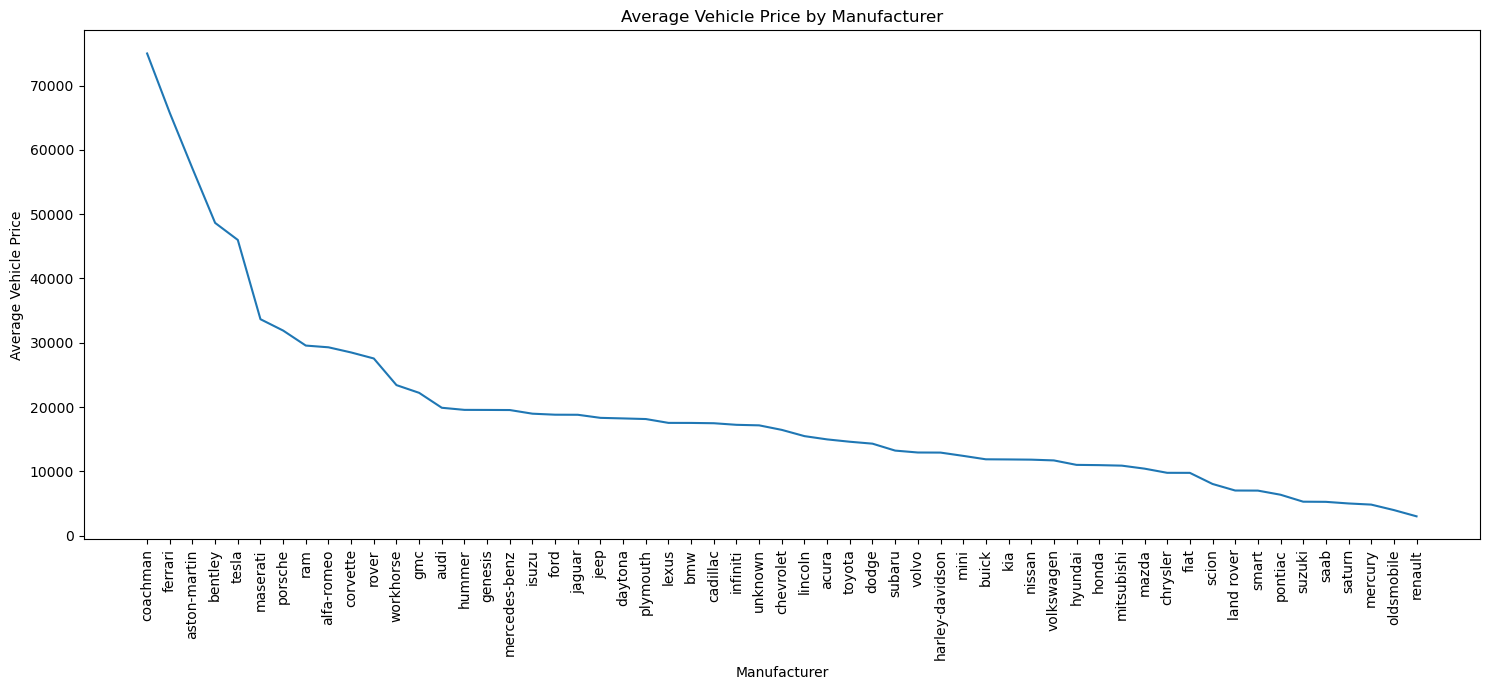

In [10]:
avg_price_by_brand = vehicles.groupby("manufacturer")["make_mean_value"].mean().sort_values(ascending=False)
plt.figure(figsize=(15,7))
plt.plot(avg_price_by_brand.index, avg_price_by_brand.values)
plt.title('Average Vehicle Price by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average Vehicle Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### 5.4. Price vs. Cylinders

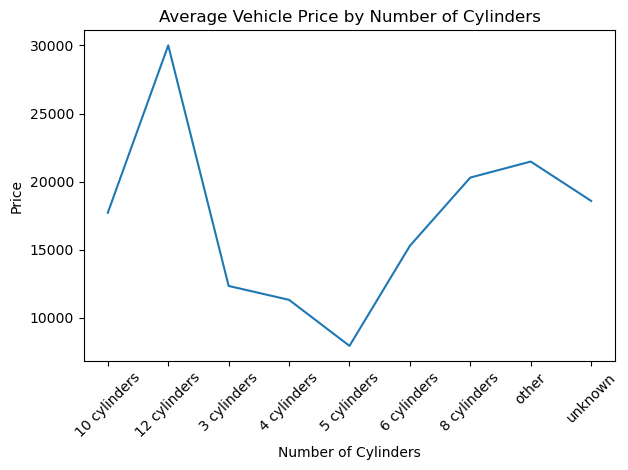

In [11]:
avg_price_by_year = vehicles.groupby("cylinders")["price"].mean()
plt.plot(avg_price_by_year.index, avg_price_by_year.values)
plt.xticks(rotation=45)
plt.title('Average Vehicle Price by Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

#### 5.5. Price vs. Type

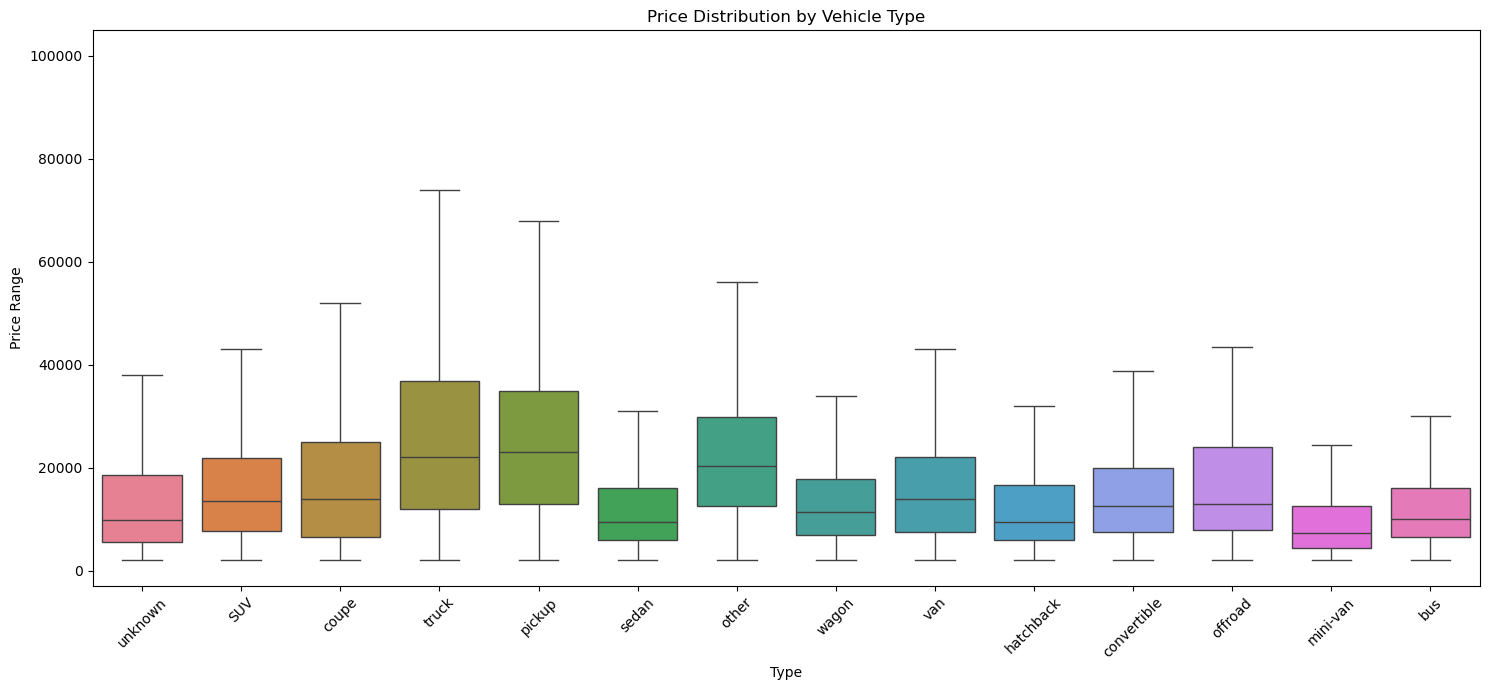

In [12]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "type", y = 'price', data = vehicles, fliersize=0, hue = 'type')
plt.xticks(rotation=45)
plt.xlabel('Type')
plt.ylabel('Price Range')
plt.title('Price Distribution by Vehicle Type')
plt.tight_layout()
plt.show()

#### 5.6. Price vs. Type vs. Year

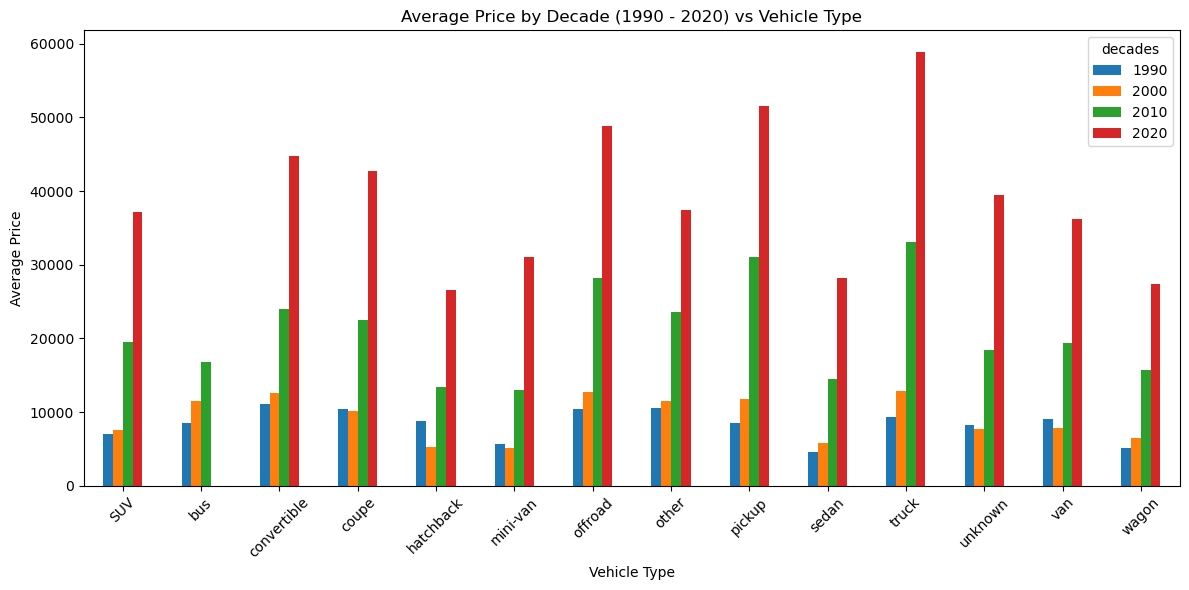

In [13]:
mean_price_by_type_decade = (vehicles.groupby(['type', 'decades'])['price'].mean().unstack('decades'))
mean_price_by_type_decade.plot(kind='bar', figsize=(12,6))
plt.ylabel('Average Price')
plt.xlabel('Vehicle Type')
plt.title('Average Price by Decade (1990 - 2020) vs Vehicle Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

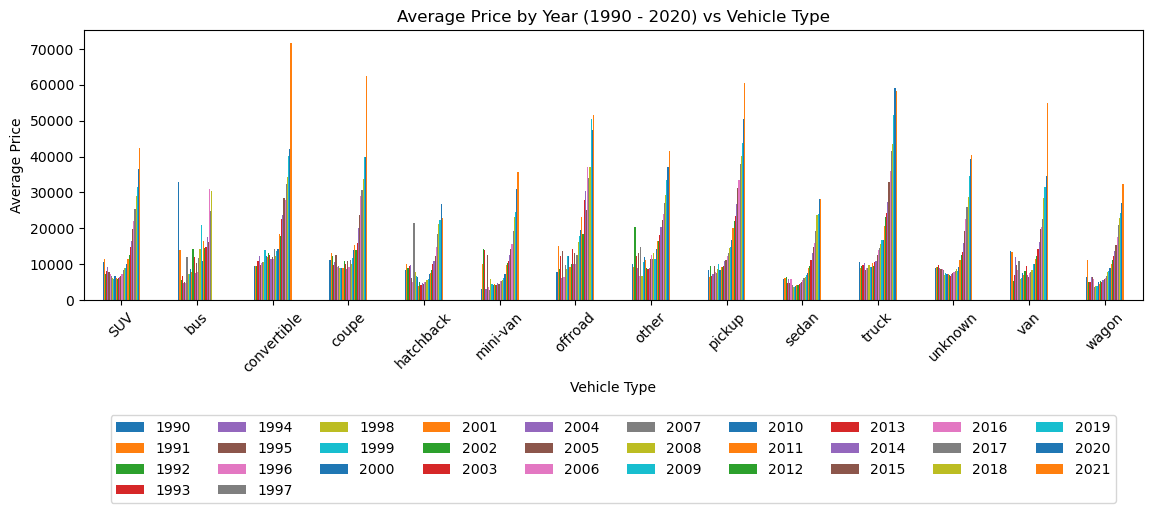

In [14]:
mean_price_by_type_year = (vehicles.groupby(['type', 'year'])['price'].mean().unstack('year'))
mean_price_by_type_year.plot(kind='bar', figsize=(12,6))
plt.ylabel('Average Price')
plt.xlabel('Vehicle Type')
plt.title('Average Price by Year (1990 - 2020) vs Vehicle Type')
plt.xticks(rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.4), ncol=10)
plt.tight_layout()
plt.show()

#### 5.7. Price vs. Drive vs. Year

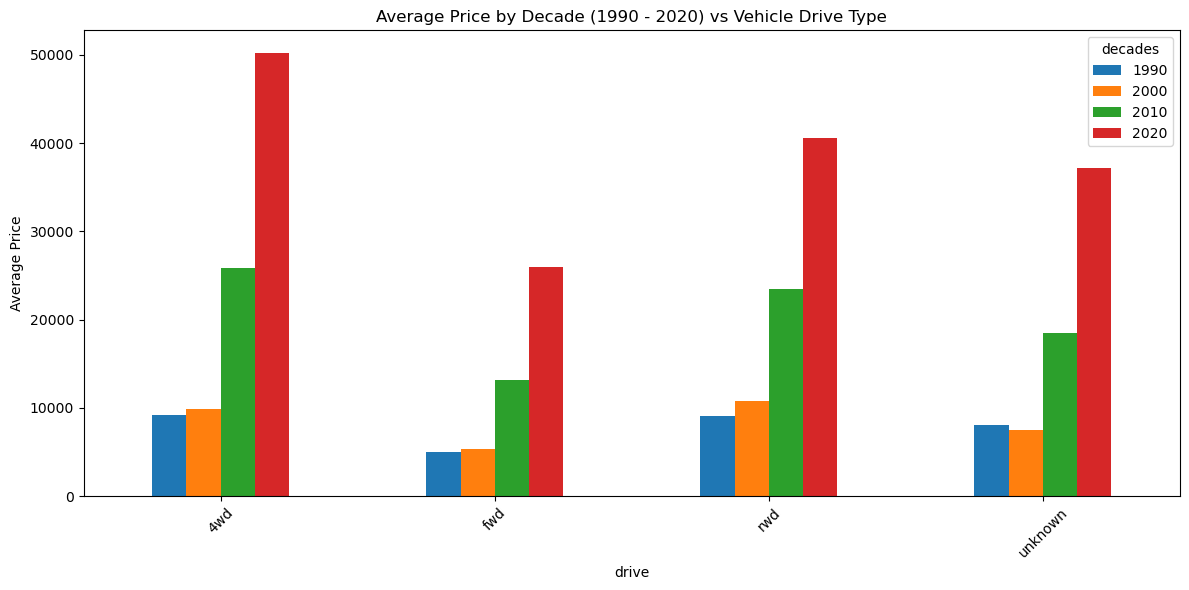

In [15]:
mean_price_by_drive_decade = (vehicles.groupby(['drive', 'decades'])['price'].mean().unstack('decades'))
mean_price_by_drive_decade.plot(kind='bar', figsize=(12,6))
plt.ylabel('Average Price')
plt.title('Average Price by Decade (1990 - 2020) vs Vehicle Drive Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

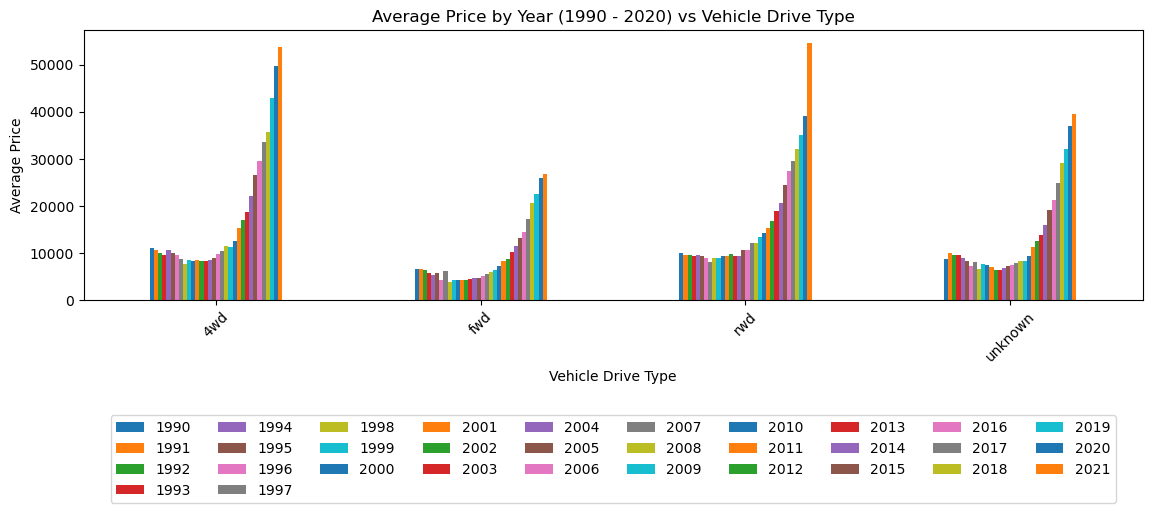

In [16]:
mean_price_by_type_decade = (vehicles.groupby(['drive', 'year'])['price'].mean().unstack('year'))
mean_price_by_type_decade.plot(kind='bar', figsize=(12,6))
plt.ylabel('Average Price')
plt.xlabel('Vehicle Drive Type')
plt.title('Average Price by Year (1990 - 2020) vs Vehicle Drive Type')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.4), ncol=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

### 6. Modeling

After exploring the cleaned dataset, it became clear that the most consistent and reliable predictors of vehicle price were year, odometer, and manufacturer. Other variables, such as cylinders, type, and certain categorical fields, were too inconsistent or erratic to model cleanly. For example, cylinders contained a mix of missing values and mismatched entries, and type grouped vehicles in ways that were too broad to produce stable estimates. Grouping by manufacturer, on the other hand, provided a more consistent structure: a sedan from Suzuki and a sedan from Maserati are not comparable, but manufacturers generally reflect established market segments and brand expectations.

With these factors identified, the modeling process began with a simple linear regression to establish a baseline. From there, additional predictors were added to form a multiple linear regression, with the goal of measuring how much each additional feature improved overall accuracy.

To capture more complex, non-linear relationships between the features and price, a polynomial regression was then tested. Several polynomial degrees were evaluated to find an appropriate balance between model flexibility and overfitting.

Ridge Regression (L2 regularization) was then applied to the best-performing polynomial degree to help stabilize the model and reduce overfitting. Lasso Regression (L1 regularization) was also tested using the same polynomial structure. While Lasso produced several convergence warnings due to the large number of polynomial features, the model still ran successfully and produced reasonable results. Lasso was slightly less accurate than Ridge, and this is because of it's restrictive filtering, it probably removed some useful polynomial terms, whereas Ridge would have kept them in. 

By generating these models in increasing order of complexity, it made it easier to see how additional feature interactions improved fit, and how applying regularization (Ridge and Lasso) helped control overfitting and improve model stability.

#### 6.1. Simple and Multiple Linear Regression

Starting with comparing price to year, then introducting odometer readings and manufacturer names as more features are added.

##### 6.1.1 Simple Linear Regression based on Price vs. Year

In [17]:
# Define columns to analyze
X = vehicles[['year']]
y = vehicles['price']

# Create the train and test set, 70-30 split, random_state = 7 to keep consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

# Make the model and fit it to the training data
year_linreg_model = LinearRegression().fit(X_train,y_train)

# Make predictions of vehicle price based on year
ylm_preds = year_linreg_model.predict(X_test)

# Calculate MSE, RSME and MAE
ylm_preds_mse = round(mean_squared_error(y_test, ylm_preds),2)
ylm_preds_rmse = round(math.sqrt(ylm_preds_mse),2)
ylm_preds_mae = round(mean_absolute_error(y_test, ylm_preds),2)

print("The MSE for this simple linear regression is:", ylm_preds_mse)
print("The RSME for this simple linear regression is:", ylm_preds_rmse)
print("The MAE for this simple linear regression is:", ylm_preds_mae)
print("Based on vehicle age alone, this model is off by approximately ± $", ylm_preds_mae, "on average.")

The MSE for this simple linear regression is: 117450336.96
The RSME for this simple linear regression is: 10837.45
The MAE for this simple linear regression is: 7888.57
Based on vehicle age alone, this model is off by approximately ± $ 7888.57 on average.


##### 6.1.2. Multiple Linear Regression on Price vs. Year and Odometer 

In [18]:
# Define columns to analyze
# odometer_grouped_upper used to group the odometer values into blocks to help categorize and manage the large volume of data.
X = vehicles[['year', 'odometer_grouped_upper']]
y = vehicles['price']

# Create the train and test set, 70-30 split, random_state = 7 to keep consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

# Make the model and fit it to the training data
year_odom_linreg_model = LinearRegression().fit(X_train,y_train)

# Make predictions of vehicle price based on year and odometer reading
yolm_preds = year_odom_linreg_model.predict(X_test)

# Calculate MSE, RSME and MAE
yolm_preds_mse = round(mean_squared_error(y_test, yolm_preds),2)
yolm_preds_rmse = round(math.sqrt(yolm_preds_mse),2)
yolm_preds_mae = round(mean_absolute_error(y_test, yolm_preds),2)

print("The MSE for this multiple linear regression is:", yolm_preds_mse)
print("The RSME for this multiple linear regression is:", yolm_preds_rmse)
print("The MAE for this multiple linear regression is:", yolm_preds_mae)
print("Based on vehicle age and odometer reading, this model is off by approximately ± $", yolm_preds_mae, "on average.")

The MSE for this multiple linear regression is: 105300998.4
The RSME for this multiple linear regression is: 10261.63
The MAE for this multiple linear regression is: 7434.83
Based on vehicle age and odometer reading, this model is off by approximately ± $ 7434.83 on average.


##### 6.1.3. Multiple Linear Regression on Price vs. Year and Odometer and Manufacturer

In [19]:
# Define columns to analyze
# make_mean_value turned categorical values into a simple brand-value indicator which could be modeled
X = vehicles[['year', 'odometer_grouped_upper', 'make_mean_value']]
y = vehicles['price']

# Create the train and test set, 70-30 split, random_state = 7 to keep consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

# Make the model and fit it to the training data
year_odom_make_linreg_model = LinearRegression().fit(X_train,y_train)

# Make predictions of vehicle price based on year and odometer reading
yomlm_preds = year_odom_make_linreg_model.predict(X_test)

# Calculate MSE, RSME and MAE
yomlm_preds_mse = round(mean_squared_error(y_test, yomlm_preds),2)
yomlm_preds_rmse = round(math.sqrt(yomlm_preds_mse),2)
yomlm_preds_mae = round(mean_absolute_error(y_test, yomlm_preds),2)

print("The MSE for this multiple linear regression is:", yomlm_preds_mse)
print("The RSME for this multiple linear regression is:", yomlm_preds_rmse)
print("The MAE for this multiple linear regression is:", yomlm_preds_mae)
print("Based on vehicle age, odometer reading, and make, this model is off by approximately ± $", yomlm_preds_mae, "on average.")

The MSE for this multiple linear regression is: 85342315.49
The RSME for this multiple linear regression is: 9238.09
The MAE for this multiple linear regression is: 6556.94
Based on vehicle age, odometer reading, and make, this model is off by approximately ± $ 6556.94 on average.


##### 6.1.4. Simple and Multiple Linear Regression Summary
In simple and multiple linear regression it can be clearly seen that by fitting more features to the model improves its predictive accuracy as it has more levels of information to work with.

In summary, knowing these three features, year, odometer reading, and manufacturer, the value of the car could be estimated with an accuracy of ±`$ 6556.94`.

In [20]:
data = {'Features': ['1 Feature', '2 Features', '3 Features'],
        'MSE' : [ylm_preds_mse, yolm_preds_mse, yomlm_preds_mse],
        'RMSE' : [ylm_preds_rmse, yolm_preds_rmse, yomlm_preds_rmse],
        'MAE' : [ylm_preds_mae, yolm_preds_mae, yomlm_preds_mae]}
error_df = pd.DataFrame(data)
error_df = error_df.set_index('Features')
error_df

,MSE,RMSE,MAE
Features,,,
1 Feature,1.174503e+08,10837.45,7888.57
2 Features,1.053010e+08,10261.63,7434.83
3 Features,8.534232e+07,9238.09,6556.94


#### 6.2. Polynomial Regression

Including the three features established in the multiple linear regression, exploratory insights were obtained before generating the Polynomial Regression Model

In [21]:
# Train/Test split

X = vehicles.loc[:,['year', 'odometer_grouped_upper', 'make_mean_value']]
y = vehicles['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [22]:
# Baseline Predictions - simple, objective benchmark

baseline_train = np.ones_like(y_train)*y_train.mean()
baseline_test = np.ones_like(y_test)*y_test.mean()

mse_baseline_train = mean_squared_error(baseline_train, y_train)
mse_baseline_test = mean_squared_error(baseline_test, y_test)
print(f'Baseline for training data: {mse_baseline_train}')
print(f'Baseline for testing data: {mse_baseline_test}')

Baseline for training data: 177000861.82755077
Baseline for testing data: 172710314.9371454


In [23]:
# Examining the correlations -establishing which of the three has the highest influence over price

# Selecting numbers only values for the price, year, odometer (grouped), and manufacturer (grouped)  
no_only = vehicles.loc[:,['price', 'year', 'odometer_grouped_upper', 'make_mean_value']]
target_col = vehicles['price']
corr_matrix = no_only.corr()
# Correlate based on 'price' being the target value
target_corr = corr_matrix['price']
highest_corr = target_corr.drop('price').abs().idxmax()

print("The column with the highest correlation to 'price' is:", highest_corr)

The column with the highest correlation to 'price' is: year


In [24]:
# Performing Polynomial Regression for degrees 1 to 5 to find which is the best fit

# Create lists for the predictions to go into
train_mses = []
test_mses = []

# For 1 - 5, input 1 - 6
for i in range(1, 6):
    #create pipeline with PolynomialFeatures degree i
    pipe = Pipeline([('polynomial', PolynomialFeatures(degree = i, include_bias = False)),('linreg', LinearRegression())])
    preds = pipe.fit(X_train, y_train)

    # Make predictions on train and test sets
    train_preds = preds.predict(X_train)
    test_preds = preds.predict(X_test)
    
    # Build an array of MSEs for the degrees 1 to 5
    train_mses.append(mean_squared_error(y_train, train_preds))
    test_mses.append(mean_squared_error(y_test, test_preds))

print("Train MSEs:", train_mses)
print("Test MSEs:",test_mses)

Train MSEs: [88253208.33678183, 77862755.21610364, 77772345.71887511, 77488586.36922297, 85465977.72781678]
Test MSEs: [85342315.4929559, 75561518.78423429, 75535376.51170328, 75326157.40300591, 83436217.51052348]


In [25]:
# Find the best fit complexity and MSE for the polynomial model

best_complexity = int(test_mses.index(min(test_mses)) + 1)
best_mse = float(min(test_mses))
print(f'The best degree polynomial model is:  {best_complexity}')
print(f'The smallest mean squared error on the test data is : {best_mse: .2f}')

The best degree polynomial model is:  4
The smallest mean squared error on the test data is :  75326157.40


In [26]:
# Remake model based on best complexity

best_pipe = Pipeline([('polynomial', PolynomialFeatures(degree = best_complexity, include_bias = False)),('linreg', LinearRegression())])
best_preds = best_pipe.fit(X_train, y_train)
best_preds = best_preds.predict(X_test)

best_preds_mse = round(mean_squared_error(y_test, best_preds),2)
best_preds_rmse = round(math.sqrt(best_preds_mse),2)
best_preds_mae = round(mean_absolute_error(y_test, best_preds),2)

print("The best MSE is:", best_preds_mse)
print("The best RMSE is:",best_preds_rmse)
print("The best MSE is:",best_preds_mae)
print("Therefore, this model is off by approximately ± $", best_preds_mae, "on average")

The best MSE is: 75326157.4
The best RMSE is: 8679.06
The best MSE is: 5894.2
Therefore, this model is off by approximately ± $ 5894.2 on average


#### 6.3. Ridge Regression (L2 Regularization)

Perform Ridge Regression using the same train/ test split and degree polynomial.

In [27]:
# Train/Test split
X = vehicles.loc[:,['year', 'odometer_grouped_upper', 'make_mean_value']]
y = vehicles['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [28]:
# To use GridSearchCV estimator - Create an unfit model - Using the best degree from before, which is 4
# Scale the model to help with Ridge Regression model
scaled_ridge_model = Pipeline([('polynomial', PolynomialFeatures(degree = best_complexity, include_bias = False)), 
                               ('scale', StandardScaler()),
                               ('ridge', Ridge())
                              ])

# Provide a range of alpha test values for it to calculate through
ridge_parameters = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}

# Create the GridSearchCV object
# "neg_mean_squared_error" for higher scoring values for GridSearchCV
# cv = 5 as a standard value
ridge_model_finder = GridSearchCV(estimator = scaled_ridge_model, param_grid = ridge_parameters, scoring = "neg_mean_squared_error", cv = 5)

# Fit to the GridSearchCV object to the training data
ridge_model_finder.fit(X_train, y_train)

# Find best estimator found
ridge_best_model = ridge_model_finder.best_estimator_

# Make predictions on test set
ridge_preds = ridge_best_model.predict(X_test)

# Find MSEs:
ridge_preds_mse = round(mean_squared_error(y_test, ridge_preds),2)
ridge_preds_rmse = round(math.sqrt(ridge_preds_mse),2)
ridge_preds_mae = round(mean_absolute_error(y_test, ridge_preds),2)

print(ridge_best_model)
print("The best MSE is:", ridge_preds_mse)
print("The best RMSE is:",ridge_preds_rmse)
print("The best MSE is:",ridge_preds_mae)
print("Therefore, this model is off by approximately ± $", ridge_preds_mae, "on average")

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('scale', StandardScaler()), ('ridge', Ridge(alpha=0.01))])
The best MSE is: 70939256.81
The best RMSE is: 8422.54
The best MSE is: 5667.5
Therefore, this model is off by approximately ± $ 5667.5 on average


#### 6.4. LASSO Regression (L1 Regularization)

Perform Lasso Regression using the same train/ test split and degree polynomial.

In [29]:
# Train/Test split
X = vehicles.loc[:,['year', 'odometer_grouped_upper', 'make_mean_value']]
y = vehicles['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [30]:
# To use GridSearchCV estimator - Create an unfit model - Using the best degree from before, which is 4
# Scale the model to help with Lasso Regression model
scaled_lasso_model = Pipeline([
    ('polynomial', PolynomialFeatures(degree = best_complexity, include_bias = False)),  
    ('scale', StandardScaler()),
    ('lasso', Lasso(max_iter=1000, tol=0.0001))  # Incorporated these variables to assist with the model calculation
])

# Provide a range of alpha test values for it to calculate through - also had to be reduced due to the complexity of the model
lasso_parameters = {'lasso__alpha': [0.01, 0.1, 1, 10, 100]}

# Create the GridSearchCV object
# "neg_mean_squared_error" for higher scoring values for GridSearchCV
# cv = 5 as a standard value
lasso_model_finder = GridSearchCV(estimator = scaled_lasso_model, param_grid = lasso_parameters, scoring = "neg_mean_squared_error", cv = 5)

# Fit to the GridSearchCV object to the training data
lasso_model_finder.fit(X_train, y_train)

# Find best estimator found
lasso_best_model = lasso_model_finder.best_estimator_

# Make predictions on test set
lasso_preds = lasso_best_model.predict(X_test)

# Find MSEs:
lasso_preds_mse = round(mean_squared_error(y_test, lasso_preds),2)
lasso_preds_rmse = round(math.sqrt(lasso_preds_mse),2)
lasso_preds_mae = round(mean_absolute_error(y_test, lasso_preds),2)

print(lasso_best_model)
print("The best MSE is:", lasso_preds_mse)
print("The best RMSE is:",lasso_preds_rmse)
print("The best MSE is:",lasso_preds_mae)
print("Therefore, this model is off by approximately ± $", lasso_preds_mae, "on average")

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('scale', StandardScaler()), ('lasso', Lasso(alpha=0.01))])
The best MSE is: 76192553.59
The best RMSE is: 8728.83
The best MSE is: 5981.46
Therefore, this model is off by approximately ± $ 5981.46 on average


---

### 6.5. Model Comparison

When comparing all the models, the Ridge Regression model with degree-4 polynomial features performed the best. It had the lowest errors (RMSE and MAE), meaning it predicted prices more accurately than the simpler models.

The Simple Linear, Multiple Linear, and Lasso models all worked reasonably well, but they were too limited to capture some of the more complex patterns in the data.

Polynomial Regression also worked well and even outperformed the Lasso model. However, it is not as stable as Ridge because it does not use any regularization, which makes it more vulnerable to overfitting. Ridge solves this by keeping the same polynomial features but shrinking them to keep the model more stable.

Lasso Regression also ran with the same degree-4 setup. It showed a few warnings while running, but still produced solid results. Lasso ended up being slightly less accurate than Ridge because it removes some polynomial terms by pushing their coefficients to zero, whereas Ridge keeps all terms and simply reduces their influence. In this dataset, those extra terms still helped the model, so keeping them (as Ridge does) led to better predictions overall.

In [31]:
final_data = {'Models': ['Simple Linear Regression', '3 Feature Multiple Regression', 'Polynomial Regression', 
                         'Ridge Regression (L2)', 'LASSO Regression (L1)'],
        'MSE' : [ylm_preds_mse, yomlm_preds_mse, best_preds_mse, ridge_preds_mse, lasso_preds_mse ],
        'RMSE' : [ylm_preds_rmse, yomlm_preds_rmse, best_preds_rmse, ridge_preds_rmse, lasso_preds_rmse],
        'MAE' : [ylm_preds_mae, yomlm_preds_mae, best_preds_mae, ridge_preds_mae, lasso_preds_mae]}
final_error_df = pd.DataFrame(final_data)
final_error_df = final_error_df.set_index('Models')
final_error_df

,MSE,RMSE,MAE
Models,,,
Simple Linear Regression,1.174503e+08,10837.45,7888.57
3 Feature Multiple Regression,8.534232e+07,9238.09,6556.94
Polynomial Regression,7.532616e+07,8679.06,5894.20
Ridge Regression (L2),7.093926e+07,8422.54,5667.50
LASSO Regression (L1),7.619255e+07,8728.83,5981.46


---

### 7. Evaluation

Based on the cleaned dataset and the decision to focus on a “standard” used-car market, the degree-4 Ridge Regression model gave the best results overall. It achieved an MAE of about `$5,667`, which means the model’s price estimates are usually within roughly ±`$5.6K` of the real market value. The RMSE (about `$8,400`) shows that bigger errors can happen, especially with unusual vehicles or listings missing key details.

An error of `$5–6K` may seem high, however, it is reasonable given that the model only uses three variables; year, odometer, and manufacturer. These features provide a basic but reliable picture of a vehicle’s value, but they cannot differentiate between specific model trims and details, engine options, modifications, or detailed condition. Real-world price variation within the same brand or model can easily reach 15–50%, such as comparing a basic Ford Focus to a higher-trim Ford F-150.

The simpler models (Simple Linear, Multiple Linear, and Polynomial Regression) also performed well but could not fully capture the more complex relationships in the data. Lasso Regression, using the same degree-4 polynomial features, produced similar but slightly worse results. This happens because Lasso removes some polynomial terms, whereas Ridge keeps all of them but shrinks their influence. In this case, the extra polynomial terms still provided some predictive value, so Ridge’s approach worked better overall.

More detailed vehicle information (model details/trim, engine type, drivetrain, condition, etc.) would significantly reduce error, but this information was not clean enough in the dataset.

---

### 8. Deployment

The results from the final model can be used by the used-car dealership as a baseline pricing tool. By relying on year, mileage, and manufacturer, the model provides consistent guidance on how different vehicles should be priced relative to one another. For example, the dealership staff can use the predictions to flag cars that appear underpriced or overpriced, and to support trade-in valuations or purchase decisions. 

While the predictions are not exact, they offer a structured starting point based hard data. This could potentially assist in cataloguing or quickly managine inventory.

---

### 9. Findings and Recommendations


**Key Findings**

- Newer cars and lower-mileage cars consistently sell for more and were the strongest predictors of price.
- Manufacturer reputation also influences price; premium brands hold value better.
- Three features (year, mileage, brand) are enough to build a fairly accurate baseline model.
- The messy “model” field limited how precise the predictions could be.
- Ridge Regression with polynomial features gave the most accurate results.

**Recommendations for the Dealership**

- Focus on acquiring vehicles under about 10–12 years old with moderate mileage (<150,000 km).
- Consider brand value when pricing inventory as some manufacturers retain value much better than others.
- Use the model’s predictions as a baseline when reviewing trade-ins or adjusting prices.
- Avoid listings with incomplete or unusual information, as they increase pricing uncertainty.
- For better future analysis, track more detailed features (trim level, engine type, features, condition notes).